In [6]:
import pandas as pd
import seaborn as sns
import numpy as npb
import matplotlib.pyplot as plt

In [7]:
data = pd.read_excel('/Users/bene/Downloads/iris.xlsx')

First we have a quick preview at the data set with head() function.
Now let's look at the info of the file.

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_length_cm  149 non-null    float64
 1   sepal_width_cm   149 non-null    float64
 2   petal_length_cm  149 non-null    float64
 3   petal_width_cm   149 non-null    float64
 4   class            149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


It's a 2240 rows x 29 columns file

In [9]:
cat = data.select_dtypes(include=['object'])
cat.head()

,class
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


In [10]:
num = data.select_dtypes(exclude=['object'])
num.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [20]:
def printColumnTypes(non_numeric_df, numeric_df):
    '''separates non-numeric and numeric columns'''
    print("Categorical data:")
    for col in non_numeric_df:
        print(f"{col}")
    print("")
    print("Numeric data:")
    for col in numeric_df:
        print(f"{col}")

In [21]:
printColumnTypes(cat, num)

Categorical data:
class

Numeric data:
sepal_length_cm
sepal_width_cm
petal_length_cm
petal_width_cm


In [22]:
data.isna().sum()

sepal_length_cm    0
sepal_width_cm     0
petal_length_cm    0
petal_width_cm     0
class              0
dtype: int64

In [24]:
file.describe()

NameError: name 'file' is not defined

<AxesSubplot:>

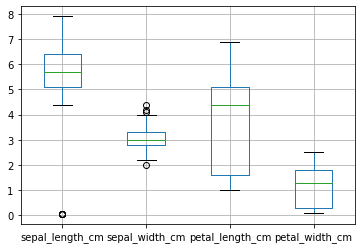

In [25]:
data.boxplot()

In [26]:
data[data['sepal_length_cm'] < 1]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
76,0.067,3.0,5.0,1.7,Iris-versicolor
77,0.060,2.9,4.5,1.5,Iris-versicolor
78,0.057,2.6,3.5,1.0,Iris-versicolor
79,0.055,2.4,3.8,1.1,Iris-versicolor
80,0.055,2.4,3.7,1.0,Iris-versicolor


In [27]:
data[data['sepal_length_cm'] < 1].mean()

sepal_length_cm    0.0588
sepal_width_cm     2.6600
petal_length_cm    4.1000
petal_width_cm     1.2600
dtype: float64

In [29]:
data.loc[data['sepal_length_cm'] < 1, 'sepal_length_cm'] = data['sepal_length_cm'] * 100

In [33]:
data.loc[data['class'] == "versicolor", 'class'] = "Iris-versicolor"

In [34]:
data.loc[data['class'] == "Iris-setossa", 'class'] = "Iris-setosa"

In [35]:
data.corr()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
sepal_length_cm,1.000000,-0.126171,0.848831,0.803656
sepal_width_cm,-0.126171,1.000000,-0.443036,-0.377517
petal_length_cm,0.848831,-0.443036,1.000000,0.960361
petal_width_cm,0.803656,-0.377517,0.960361,1.000000


In [37]:
data.isna().sum()

sepal_length_cm    0
sepal_width_cm     0
petal_length_cm    0
petal_width_cm     0
class              0
dtype: int64

In [38]:
data['petal_width_cm'][data['class'] == 'Iris-setosa'].mean()

0.2531249999999999

In [39]:
# imputing with mean
data['petal_width_cm'].fillna(data['petal_width_cm'][data['class'] == 'Iris-setosa'].mean(), inplace=True)

In [40]:
#Check if NA values left
data.isna().sum()

sepal_length_cm    0
sepal_width_cm     0
petal_length_cm    0
petal_width_cm     0
class              0
dtype: int64

In [41]:
#Check all the lines with missing data
data[data.isna().any(axis=1)]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class


## Encoding

In [45]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

#Encode Education
data["class_encoded"] = label.fit_transform(data["class"])

In [48]:
data.drop(columns=["class_enc", "class"], inplace=True)

In [49]:
data.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class_encoded
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Plot

In [50]:
import seaborn as sns

<AxesSubplot:>

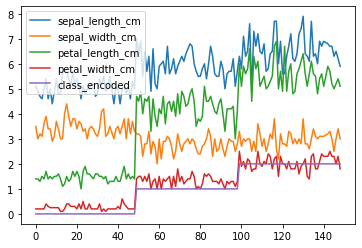

In [51]:
data.plot()

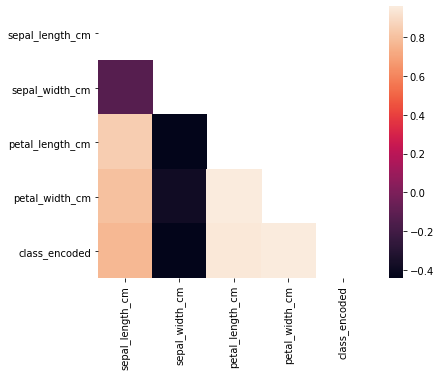

In [53]:
corr = data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(7, 5))
ax = sns.heatmap(corr, mask=mask, square=True)